<a href="https://colab.research.google.com/github/sujajohn26/sujajohn26.github.io/blob/main/CustomerBehaviorAnalysis__Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas pyfim==6.28

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyfim: filename=pyfim-6.28-cp38-cp38-linux_x86_64.whl size=540643 sha256=fcbba0a0318bf7ae79635aa08a2484752a6f9a9a9993e4ea039d79abe75e3399
  Stored in directory: /root/.cache/pip/wheels/63/55/a8/2c0948641da51af014ab239f1724b573a059005b8a51d282a2
Successfully built pyfim


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fim import apriori

In [ ]:
basketdf = pd.read_csv('clean_basketdf.csv', index_col=0, decimal='.')

In [ ]:
basketdf.head()

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta,Amount
0,536365,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,15.30
1,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053,WHITE METAL LANTERN,6.0,20.34
2,536365,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,22.00
3,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,20.34
4,536365,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,20.34


In [ ]:
transactions = basketdf.groupby(['BasketID'])['ProdDescr'].apply(list)
baskets = transactions.values

print("NUM OF BASKETS: {}".format(len(baskets)))

NUM OF BASKETS: 2698


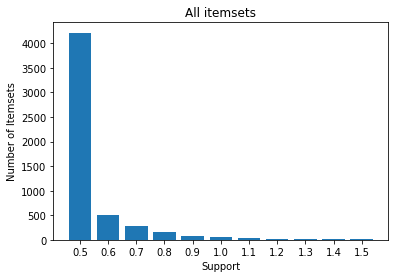

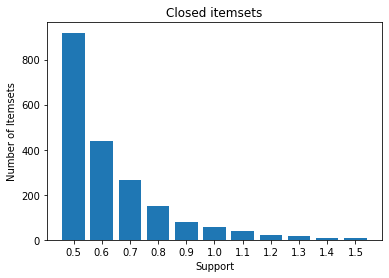

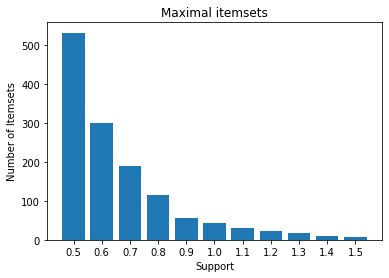

In [ ]:
def plot_frequent_patterns(target, title):
    res = {}
    for i in np.arange(.5, 1.6, .1):
        supp = round(i,2)
        sets = apriori(baskets, supp=supp, zmin=3, target=target)
        res[supp] = len(sets)

    plt.bar(range(len(res)), list(res.values()), align='center')
    plt.xticks(range(len(res)), list(res.keys()))


    plt.xlabel("Support")
    plt.ylabel("Number of Itemsets")
    plt.title("{} itemsets".format(title))
    plt.show()

plot_frequent_patterns('a', "All")
plot_frequent_patterns('c', "Closed")
plot_frequent_patterns('m', "Maximal")

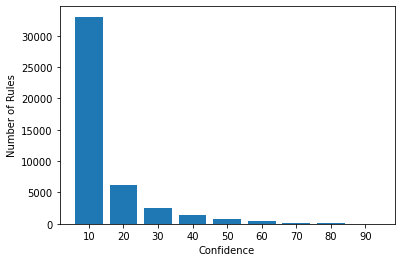

In [ ]:
def plot_rules_confidence():
    bar_res = {}
    for i in np.arange(10, 100, 10):
        rls = apriori(baskets, supp=1, zmin=3, conf=i, target='r')
        bar_res[i] = len(rls)

    plt.bar(range(len(bar_res)), list(bar_res.values()), align='center')
    plt.xticks(range(len(bar_res)), list(bar_res.keys()))

    plt.xlabel("Confidence")
    plt.ylabel("Number of Rules")
    plt.show()

plot_rules_confidence()

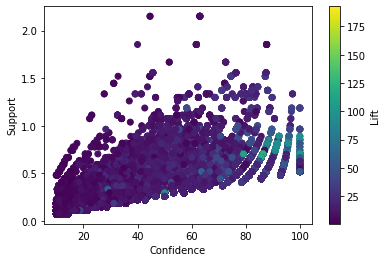

In [ ]:
def plot_conf_support():
    res = []
    for supp in np.arange(.5, 1.6, .1):
        for confidence in np.arange(10, 100, 10):
            support = round(supp,2)
            rls = apriori(baskets, supp=support, conf=confidence, zmin=3, target='r', report='SCl')
            for r in rls:
                res.append({ 'supp': r[2], 'conf': r[3], 'lift': r[4]})

    df_results = pd.DataFrame(res)
    df_results = df_results.sample(100000)

    plt.scatter(df_results['conf'], df_results['supp'], c=df_results['lift'], cmap='viridis')
    plt.xlabel("Confidence")
    plt.ylabel("Support")
    plt.colorbar(label="Lift")
    plt.show()

plot_conf_support()


In [ ]:
itemsets = apriori(baskets, supp=1, zmin=3, target='a', report='aS')
df_itemsets = pd.DataFrame(itemsets, columns=['Itemset', 'Count', 'Support'])
df_itemsets['Support'] = df_itemsets['Support'].round(2)
df_itemsets.sort_values('Support', ascending=False, inplace=True)
df_itemsets[:10]

,Itemset,Count,Support
57,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL,...",58,2.15
40,"(CANDLEHOLDER PINK HANGING HEART, RED HANGING ...",50,1.85
38,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",45,1.67
6,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",42,1.56
24,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",42,1.56
55,"(RED HANGING HEART T-LIGHT HOLDER, HEART OF WI...",41,1.52
23,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",41,1.52
56,"(RED HANGING HEART T-LIGHT HOLDER, HEART OF WI...",39,1.45
30,"(WOOD 2 DRAWER CABINET WHITE FINISH, WOODEN PI...",38,1.41
28,"(PINK 3 PIECE POLKADOT CUTLERY SET, RED 3 PIEC...",38,1.41


In [ ]:
rules = apriori(baskets, supp=1, zmin=3, conf=70, target='r', report='SCl')

df_rules = pd.DataFrame(rules, columns =['Post', 'Pre', 'Support', 'Confidence', 'Lift'])
df_rules.sort_values('Support', ascending=False, inplace=True)
df_rules[:15]


,Post,Pre,Support,Confidence,Lift
150,WHITE HANGING HEART T-LIGHT HOLDER,"(CANDLEHOLDER PINK HANGING HEART, RED HANGING ...",1.853225,87.719298,5.814906
147,WOODEN PICTURE FRAME WHITE FINISH,"(WOODEN FRAME ANTIQUE WHITE , WHITE HANGING HE...",1.667902,72.580645,15.665806
146,WOODEN FRAME ANTIQUE WHITE,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG...",1.667902,72.580645,13.231255
123,ALARM CLOCK BAKELIKE GREEN,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",1.556709,76.363636,15.375305
122,ALARM CLOCK BAKELIKE RED,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",1.556709,76.363636,15.375305
55,ALARM CLOCK BAKELIKE GREEN,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",1.556709,87.500000,17.617537
54,ALARM CLOCK BAKELIKE RED,"(ALARM CLOCK BAKELIKE ORANGE, ALARM CLOCK BAKE...",1.556709,76.363636,15.375305
166,WHITE HANGING HEART T-LIGHT HOLDER,"(RED HANGING HEART T-LIGHT HOLDER, HEART OF WI...",1.519644,74.545455,4.941613
113,POPPY'S PLAYHOUSE KITCHEN,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",1.519644,87.234043,31.805060
114,POPPY'S PLAYHOUSE BEDROOM,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",1.519644,87.234043,34.611389
